In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [10]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [ ]:
print(df['diet'].value_counts())
print(df['body_type'].value_counts())
print(df['education'].value_counts())

In [13]:
print(df['drinks'].value_counts())
print(df['smokes'].value_counts())

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64


### Defining the problem to be solved with ML

Classifying a person's status based on age, sex, orientation, drinking behavior, and smoking behavior.

In [2]:
x = df[['sex', 'orientation', 'smokes']]

y = df[['status']]

#### Relabel categories of variables to numbers

In [3]:
# convert variables to categories
x['sex']=pd.Categorical(x['sex'])
x['sex'] = x['sex'].cat.rename_categories([0,1])

x['orientation']=pd.Categorical(x['orientation'])
x['orientation'] = x['orientation'].cat.rename_categories([0,1,2])

x['smokes']=pd.Categorical(x['smokes'])
x['smokes'] = x['smokes'].cat.rename_categories([0,1,2,3,4])

y['status']=pd.Categorical(y['status'])
y['status'] = y['status'].cat.rename_categories([0,1,2,3,4])


C:\Users\enl90\AppData\Local\Temp/ipykernel_1648/21648509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex']=pd.Categorical(x['sex'])
C:\Users\enl90\AppData\Local\Temp/ipykernel_1648/21648509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex'] = x['sex'].cat.rename_categories([0,1])
C:\Users\enl90\AppData\Local\Temp/ipykernel_1648/21648509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

#### Split the data into a training set and test set

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, train_size=0.8)

In [65]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(47956, 3)
(47956, 1)
(11990, 3)
(11990, 1)


In [66]:
x_train.head()

,sex,orientation,smokes
48232,0,2,0
15491,1,2,0
5964,0,2,0
17093,0,1,NaN
23337,1,2,0


#### Create an instance of the classifier and use it to fit the training data

In [5]:
classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
classifier.get_depth()

8

In [6]:
predictions = classifier.predict(x_test)

print(classifier.score(x_test, y_test))

0.9310258548790659


### KNN Classifier

In [21]:
tweets = pd.read_json('random_tweets.json', lines = True)
tweets.keys()

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')

In [29]:
pd.concat([tweets, tweets['user'].apply(pd.Series)], axis=1)

In [32]:
tweets['user'].apply(pd.Series).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  11099 non-null  int64 
 1   id_str                              11099 non-null  object
 2   name                                11099 non-null  object
 3   screen_name                         11099 non-null  object
 4   location                            11099 non-null  object
 5   description                         11099 non-null  object
 6   url                                 3448 non-null   object
 7   entities                            11099 non-null  object
 8   protected                           11099 non-null  bool  
 9   followers_count                     11099 non-null  int64 
 10  friends_count                       11099 non-null  int64 
 11  listed_count                        11099 non-null  in

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

C:\Users\enl90\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9252022687463508

In [15]:
knn.score(x_test, y_test)

0.9272727272727272

In [16]:
training_accuracy  = []  
test_accuracy = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

C:\Users\enl90\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\enl90\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\enl90\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\enl90\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ret

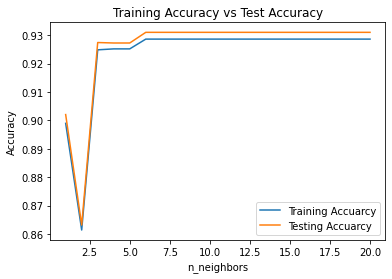

In [18]:
plt.figure()
plt.plot(range(1, 21), training_accuracy, label='Training Accuarcy')
plt.plot(range(1, 21), test_accuracy, label='Testing Accuarcy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [69]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= -4611686018427387904.00
|   |   |   |--- class: 3
|   |   |--- feature_2 >  -4611686018427387904.00
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |--- class: 3
|   |--- feature_0 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_2 <= -4611686018427387904.00
|   |   |   |   |--- class: 3
|   |   |   |--- feature_2 >  -4611686018427387904.00
|   |   |   |   |--- class: 3
|   |   |--- feature_2 >  0.50
|   |   |   |--- feature_2 <= 3.50
|   |   |   |   |--- feature_2 <= 1.50
|  

[Text(594.4602272727273, 1026.8, 'X[1] <= 0.5\ngini = 0.135\nsamples = 47956\nvalue = [1495, 246, 1676, 44532, 7]'),
 Text(221.9318181818182, 906.0, 'X[0] <= 0.5\ngini = 0.459\nsamples = 2199\nvalue = [358, 50, 231, 1560, 0]'),
 Text(95.11363636363636, 785.2, 'X[2] <= -4.611686018427388e+18\ngini = 0.452\nsamples = 1598\nvalue = [223, 42, 187, 1146, 0]'),
 Text(63.40909090909091, 664.4, 'gini = 0.306\nsamples = 136\nvalue = [11, 0, 13, 112, 0]'),
 Text(126.81818181818181, 664.4, 'X[2] <= 1.5\ngini = 0.464\nsamples = 1462\nvalue = [212, 42, 174, 1034, 0]'),
 Text(63.40909090909091, 543.6, 'X[2] <= 0.5\ngini = 0.481\nsamples = 1152\nvalue = [182, 35, 138, 797, 0]'),
 Text(31.704545454545453, 422.79999999999995, 'gini = 0.479\nsamples = 964\nvalue = [151, 32, 112, 669, 0]'),
 Text(95.11363636363636, 422.79999999999995, 'gini = 0.49\nsamples = 188\nvalue = [31, 3, 26, 128, 0]'),
 Text(190.22727272727272, 543.6, 'X[2] <= 3.5\ngini = 0.392\nsamples = 310\nvalue = [30, 7, 36, 237, 0]'),
 Text

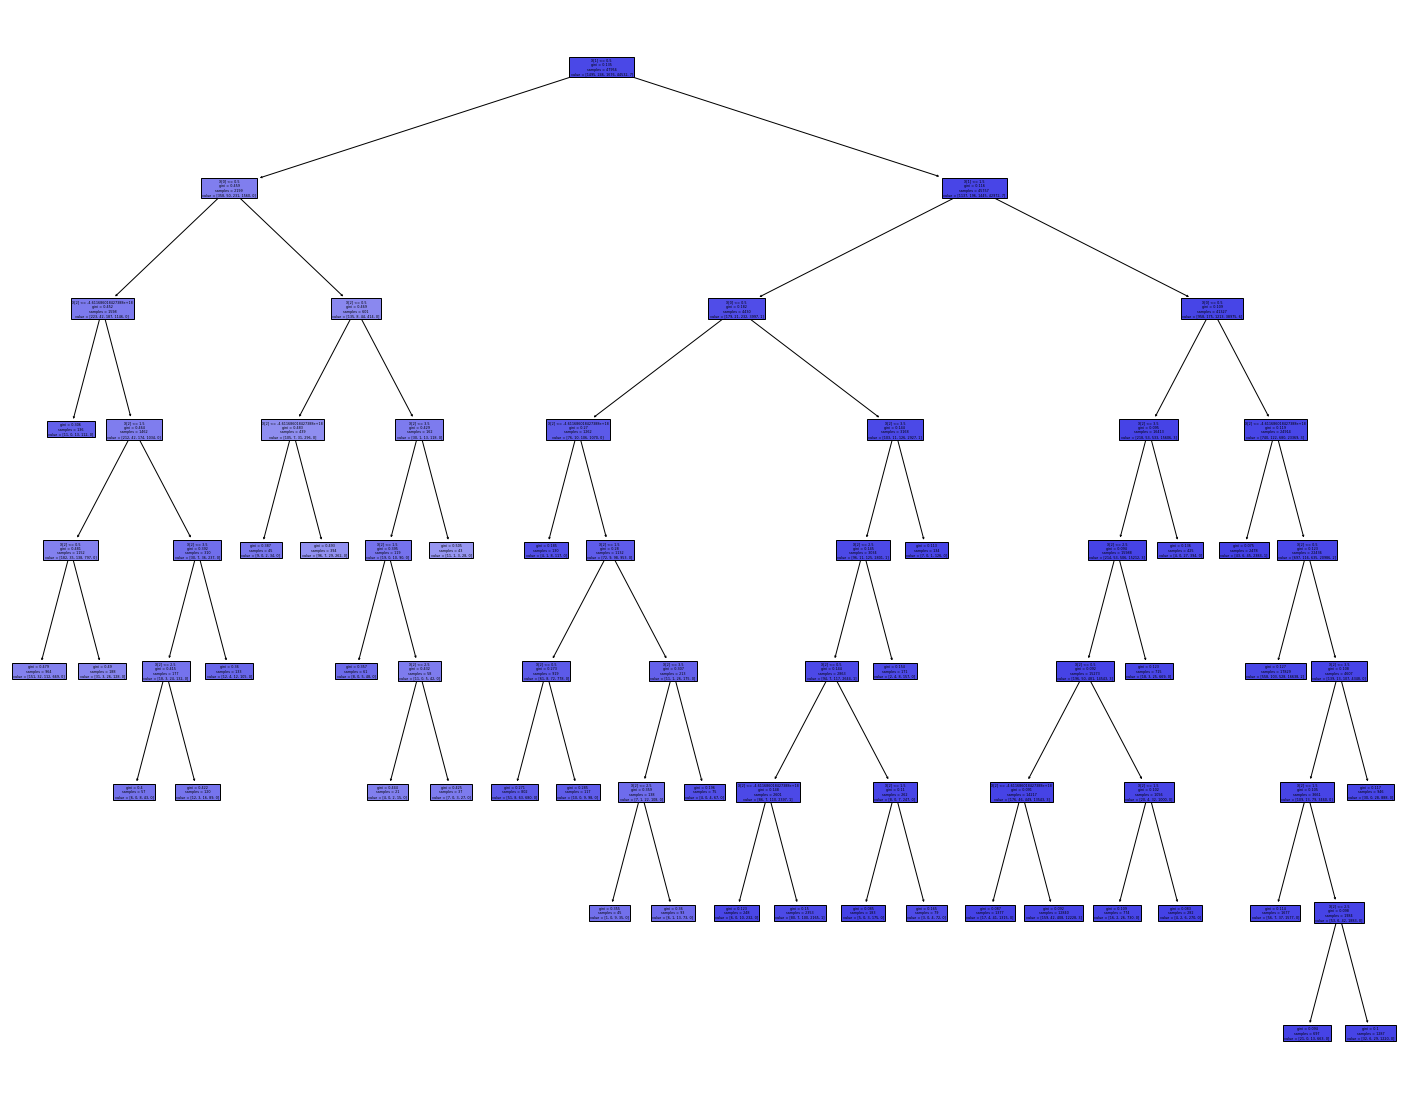

In [70]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier, 
               filled=True)